# Question 1: Use yfinance to Extract Stock Data

In [1]:
!pip install yfinance
import yfinance as yf


In [3]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.to_csv('tesla_stock.csv')
tesla_data.reset_index(inplace=True)
print(tesla_data.head())
tesla_data.to_csv('tesla_stock_data.csv', index=False)

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


 # Question 2: Use Webscraping to Extract Tesla Revenue Data

In [4]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
!pip install html5lib



In [5]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"}
html_data = requests.get(url, headers=headers).text

soup = BeautifulSoup(html_data, "lxml")

tables = soup.find_all("table")
for table in tables:
    if "Tesla Quarterly Revenue" in str(table):
        tesla_revenue = pd.read_html(str(table))[0]
        break

tesla_revenue.columns = ["Date", "Revenue"]  # Rename columns
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",", "").str.replace("$", "").astype(float)
print(tesla_revenue.tail())


          Date  Revenue
58  2010-06-30     28.0
59  2010-03-31     21.0
60  2009-12-31      NaN
61  2009-09-30     46.0
62  2009-06-30     27.0


C:\Users\yoges\AppData\Local\Temp\ipykernel_580\2884444042.py:10: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(table))[0]


In [8]:
# Question 3: Use yfinance to Extract Stock Data

#Reset the index, save, and display the first five rows of the gme_data dataframe using the head function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [ ]:
import yfinance as yf


In [9]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
print(gme_data.head())
gme_data.to_csv('gme_stock_data.csv', index=False)

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603296  1.662209   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [10]:
# Question 4: Use Webscraping to Extract GME Revenue Data

#Display the last five rows of the gme_revenue dataframe using the tail function. Upload a screenshot of the results.

In [11]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [12]:

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"}
html_data = requests.get(url, headers=headers).text
soup = BeautifulSoup(html_data, "html.parser")
tables = soup.find_all("table")
for table in tables:
    if "GameStop Quarterly Revenue" in str(table):
        gme_revenue = pd.read_html(str(table))[0]
        break
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace("$", "").str.replace(",", "").astype(float)
print(gme_revenue.tail())


          Date  Revenue
59  2010-01-31   3524.0
60  2009-10-31   1835.0
61  2009-07-31   1739.0
62  2009-04-30   1981.0
63  2009-01-31   3492.0


C:\Users\yoges\AppData\Local\Temp\ipykernel_580\3585412454.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(str(table))[0]


In [13]:
#Question 5: Plot Tesla Stock Graph

#Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph. Upload a screenshot of your results.

In [14]:
import yfinance as yf
import matplotlib.pyplot as plt


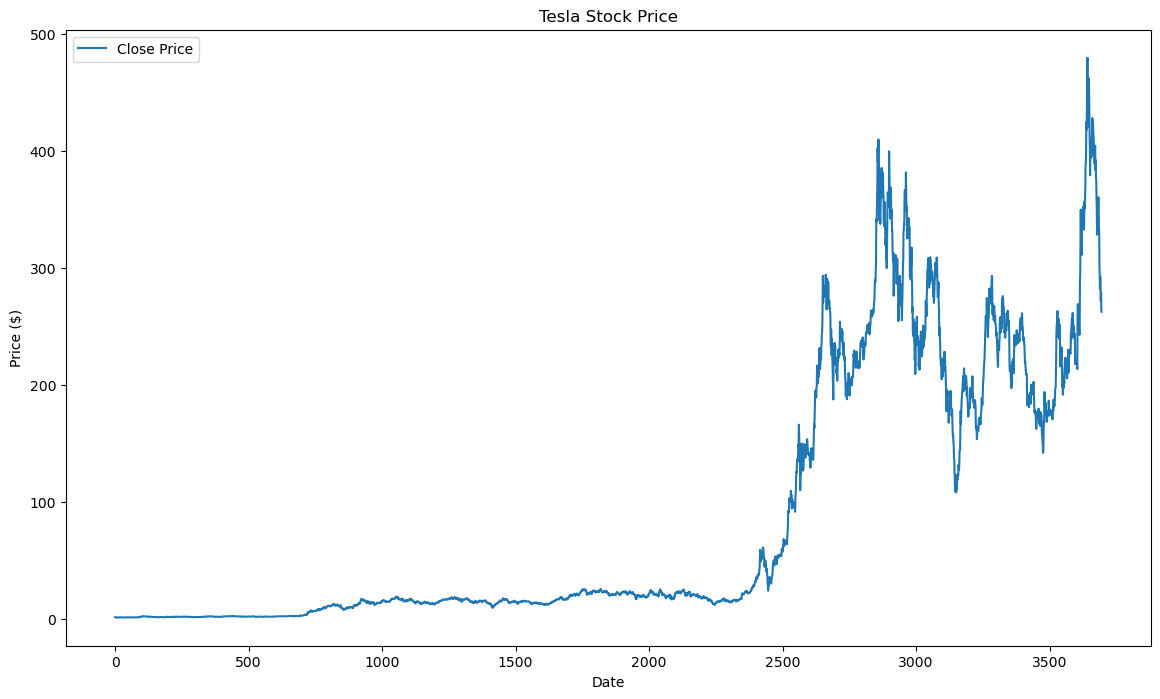

In [15]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)


def make_graph(stock_data, company_name):
    plt.figure(figsize=(14,8))
    
    plt.plot(stock_data['Close'], label='Close Price')
    
    plt.title(f"{company_name} Stock Price")
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.legend()
    
    plt.show()

make_graph(tesla_data, "Tesla")


In [ ]:
# Question 6: Plot GameStop Stock Graph

# Use the make_graph function to graph the GameStop Stock Data, also provide a title for the graph. Upload a screenshot of your results.

In [16]:
import yfinance as yf
import matplotlib.pyplot as plt



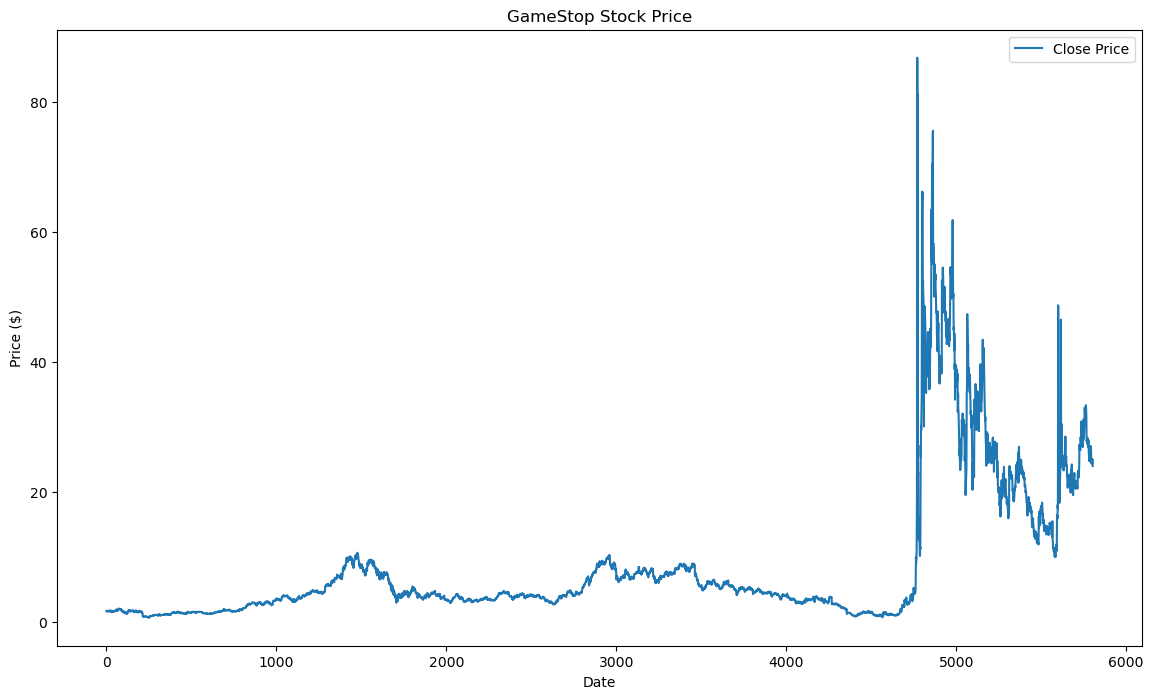

In [17]:

gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)


def make_graph(stock_data, company_name):
    plt.figure(figsize=(14,8))
    
    plt.plot(stock_data['Close'], label='Close Price')
    
    plt.title(f"{company_name} Stock Price")
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.legend()
    
    plt.show()


make_graph(gme_data, "GameStop")


In [ ]:
# 